# imports

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from langdetect import DetectorFactory, detect, detect_langs
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

In [118]:
def maximum(a, b, c):
    if (a >= b) and (a >= c):
        largest = 'neg'
  
    elif (b >= a) and (b >= c):
        largest = 'neu'
    else:
        largest = 'pos'
          
    return largest

In [119]:
df = pd.read_csv('barkha.csv')
l=[]
for i in range(len(df)):
    x=maximum(df['neg'][i],df['neu'][i],df['pos'][i])
    l.append(x)

df['sentiment_status']=l

In [120]:
df.head()

,Name,Comment,Likes,Reply_Count,Time,date,hour,month,Tokenize,stemmed,compound,neg,neu,pos,polarity,subjectivity,empath_score,sentiment_status
0,Soumik Bera,5 42 when ayush mail s barkha good morning wha...,0,0,2021-09-12T13:20:21Z,12,13,9,"['5', '42', 'when', 'ayush', 'mail', 's', 'bar...","['5', '42', 'when', 'ayush', 'mail', 's', 'bar...",0.6597,0.000,0.735,0.265,0.7,0.600000,0.684211,neu
1,Adarsh Yadav,i want to see ayush and barkha together a one ...,0,0,2021-09-01T14:54:11Z,1,14,9,"['i', 'want', 'to', 'see', 'ayush', 'and', 'ba...","['i', 'want', 'to', 'see', 'ayush', 'and', 'ba...",0.0772,0.000,0.874,0.126,0.5,0.500000,0.000000,neu
2,Rachana L,literally barkha and ayush will make a good pa...,1,0,2021-08-24T05:00:37Z,24,5,8,"['literally', 'barkha', 'and', 'ayush', 'will'...","['liter', 'barkha', 'and', 'ayush', 'will', 'm...",0.6597,0.000,0.690,0.310,0.7,0.600000,0.125000,neu
3,Sejal Chaudhary,barkha and ayush together looking so cute,1,0,2021-08-21T10:16:54Z,21,10,8,"['barkha', 'and', 'ayush', 'together', 'lookin...","['barkha', 'and', 'ayush', 'togeth', 'look', '...",0.5949,0.000,0.608,0.392,0.5,1.000000,0.857143,neu
4,CR MOTIONS,here s a teaser of ayush mehra and barkha sing...,0,0,2021-08-14T05:39:01Z,14,5,8,"['here', 's', 'a', 'teaser', 'of', 'ayush', 'm...","['here', 's', 'a', 'teaser', 'of', 'ayush', 'm...",0.4215,0.081,0.726,0.194,0.5,0.888889,0.038462,neu


In [121]:
X=df.drop(['Name','Comment','Time','Tokenize','stemmed','sentiment_status'],axis=1)

In [122]:
y=df['sentiment_status']

In [123]:
df['sentiment_status'].unique()

array(['neu', 'pos', 'neg'], dtype=object)

In [124]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [125]:
y=le.transform(y)
y=pd.Series(y)

In [126]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                    n_estimators=100, oob_score=True)

In [127]:
%%time
classifier_rf.fit(X, y)

Wall time: 211 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [128]:
# checking the oob score
classifier_rf.oob_score_

0.996029776674938

In [99]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [100]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [103]:
%%time
grid_search.fit(X, y)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\MSI-PC\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


Wall time: 32.6 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [104]:
grid_search.best_score_

0.9955327558458771

In [105]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

[Text(2678.3999999999996, 1812.0, 'neu <= 0.499\ngini = 0.2\nsamples = 1276\nvalue = [0, 1788, 227]\nclass = pos'),
 Text(1785.6, 1087.2, 'compound <= 0.391\ngini = 0.184\nsamples = 158\nvalue = [0, 26, 227]\nclass = neg'),
 Text(892.8, 362.39999999999986, 'gini = 0.375\nsamples = 6\nvalue = [0, 9, 3]\nclass = pos'),
 Text(2678.3999999999996, 362.39999999999986, 'gini = 0.131\nsamples = 152\nvalue = [0, 17, 224]\nclass = neg'),
 Text(3571.2, 1087.2, 'gini = 0.0\nsamples = 1118\nvalue = [0, 1762, 0]\nclass = pos')]

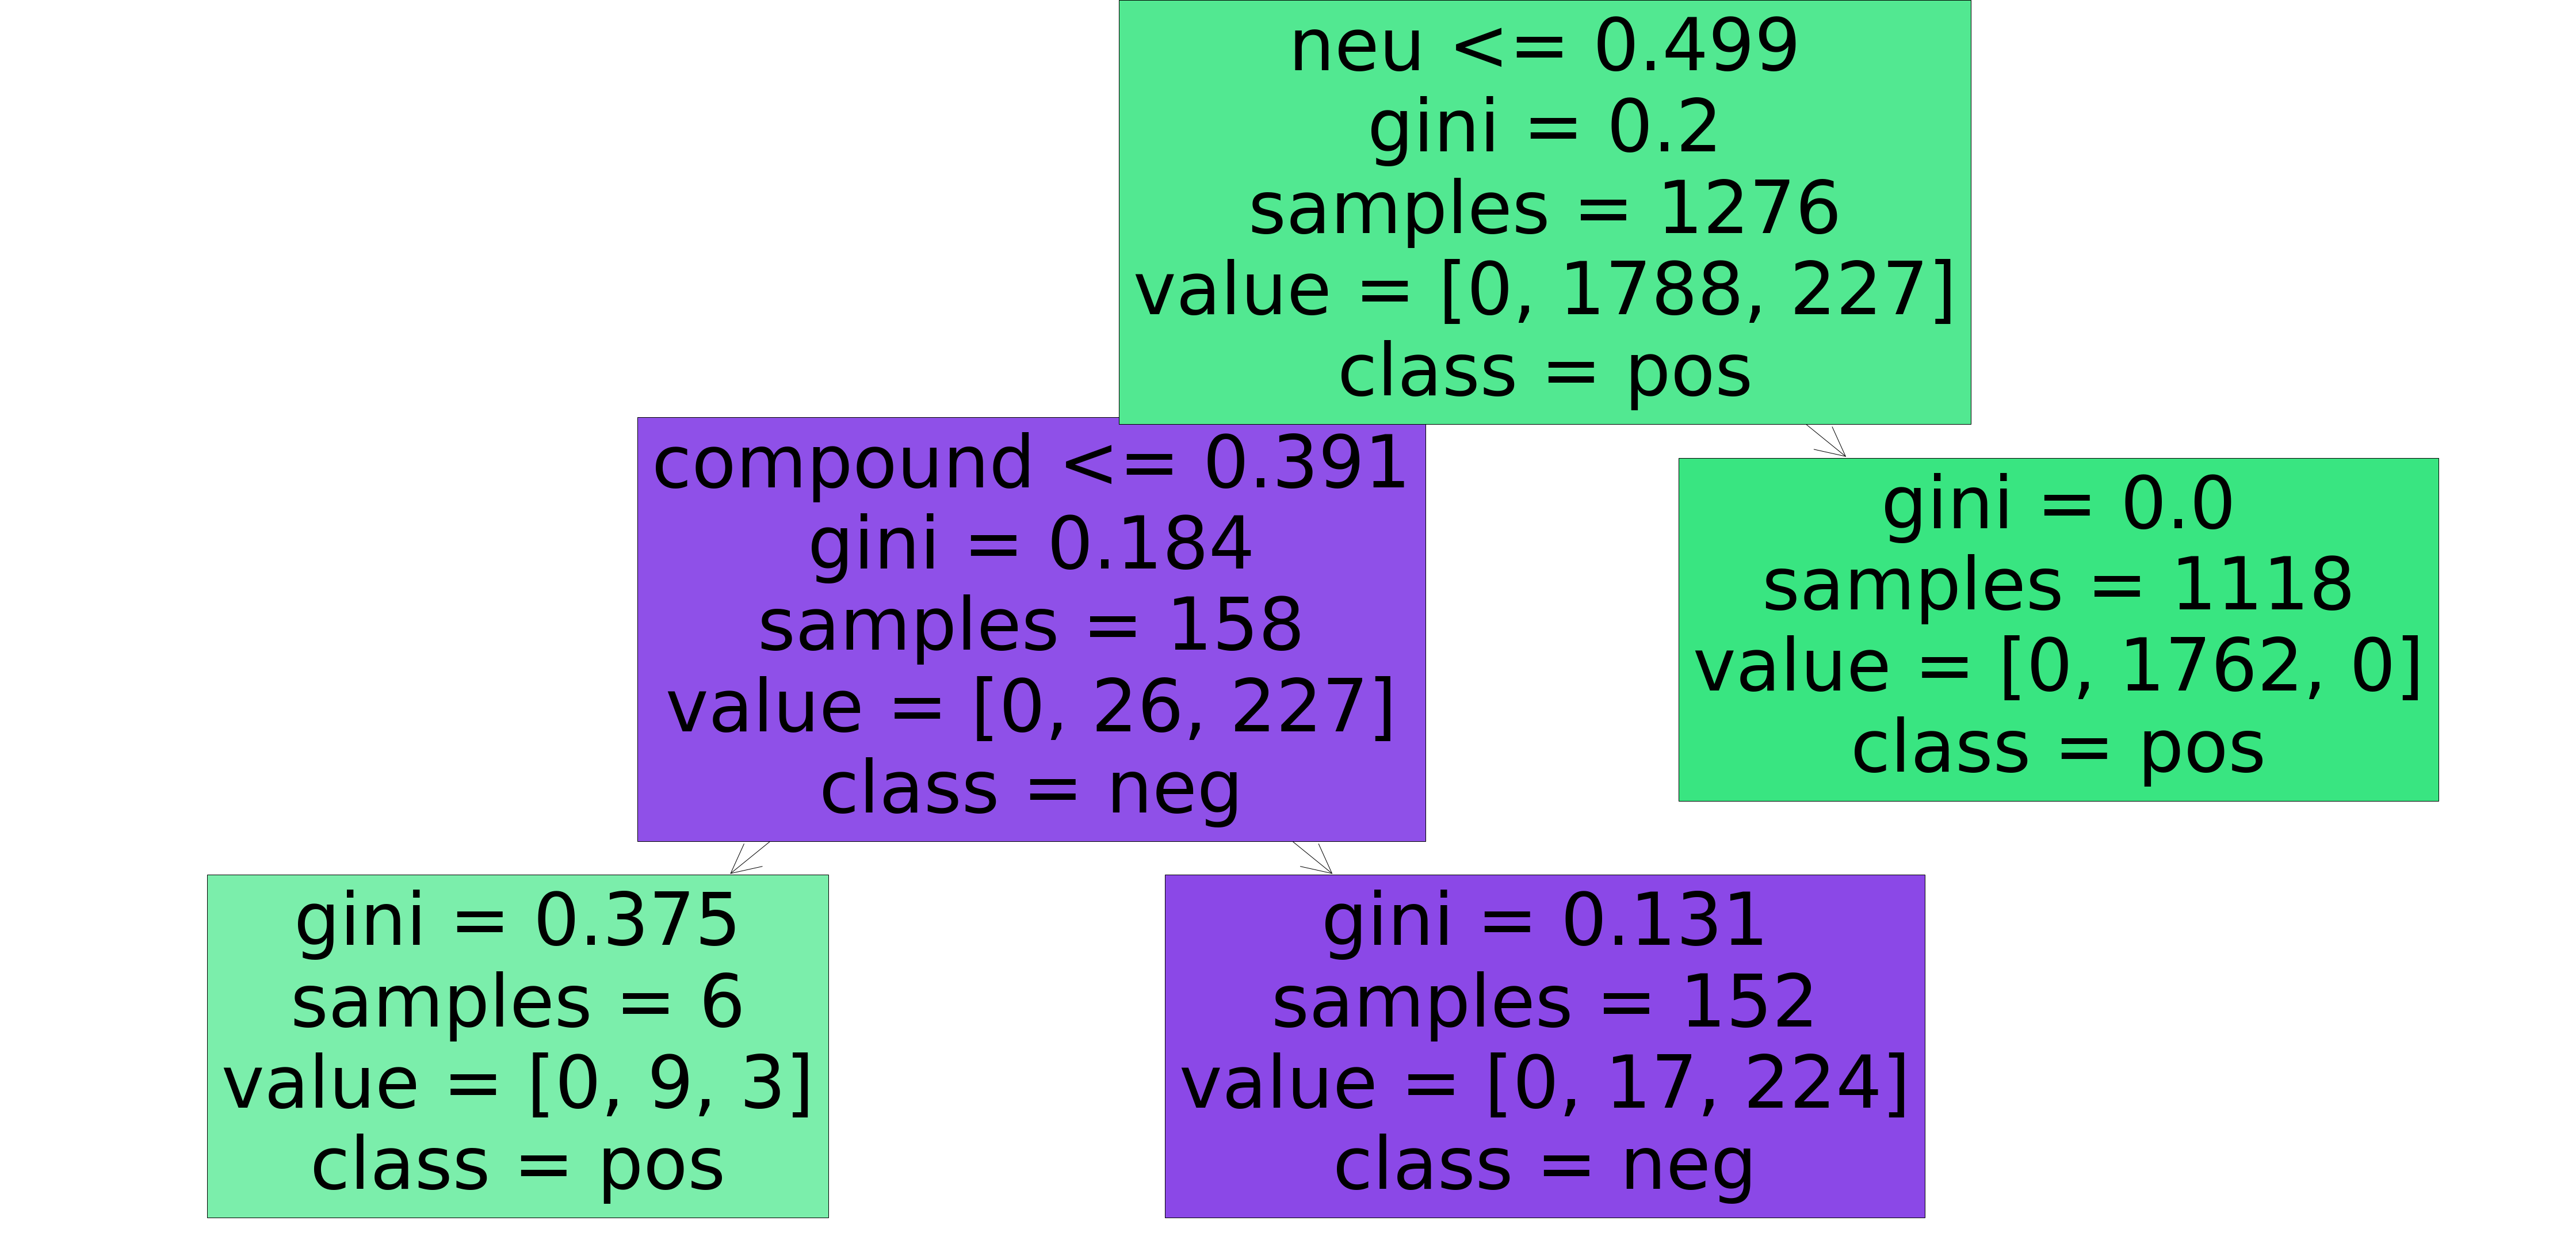

In [107]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['neu', 'pos', 'neg'],filled=True)

In [108]:
rf_best.feature_importances_

array([0.00100688, 0.        , 0.        , 0.        , 0.        ,
       0.11628255, 0.02046479, 0.22428963, 0.50332461, 0.03288847,
       0.02327254, 0.07847054])

In [110]:
imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp": rf_best.feature_importances_
})

In [129]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
8,pos,0.503325
7,neu,0.224290
5,compound,0.116283
11,empath_score,0.078471
9,polarity,0.032888
10,subjectivity,0.023273
6,neg,0.020465
0,Likes,0.001007
1,Reply_Count,0.000000
2,date,0.000000
